In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [2]:
store = pd.read_csv(r"C:\Users\Admin\Downloads\SampleSuperstore\SampleSuperstore.csv")
store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
store_original=store.copy() 

In [4]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Target Variable

In [7]:
store['Profit'] = store['Profit'].astype(float)

In [8]:
store['Profit_cat'] = np.where(store['Profit'] >= 0, 'P','L')

In [9]:
store['Profit_cat'].value_counts()

P    8123
L    1871
Name: Profit_cat, dtype: int64

In [10]:
store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [11]:
store['Profit_cat'].value_counts(normalize=True)

P    0.812788
L    0.187212
Name: Profit_cat, dtype: float64

<AxesSubplot:>

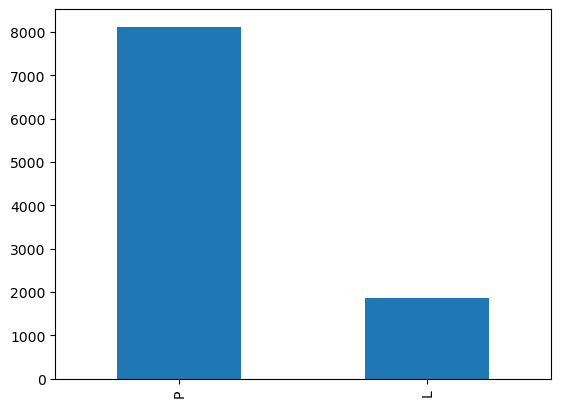

In [12]:
store['Profit_cat'].value_counts().plot.bar()

In [13]:
X = store.drop('Profit',axis= 1)
Y = store['Profit']

X.shape, Y.shape

((9994, 13), (9994,))

## Independent varaible


1 catogorical (a-nominal , b-ordinal)
2 Numerical (a-district ,b-continous)

### 1 Catogorical

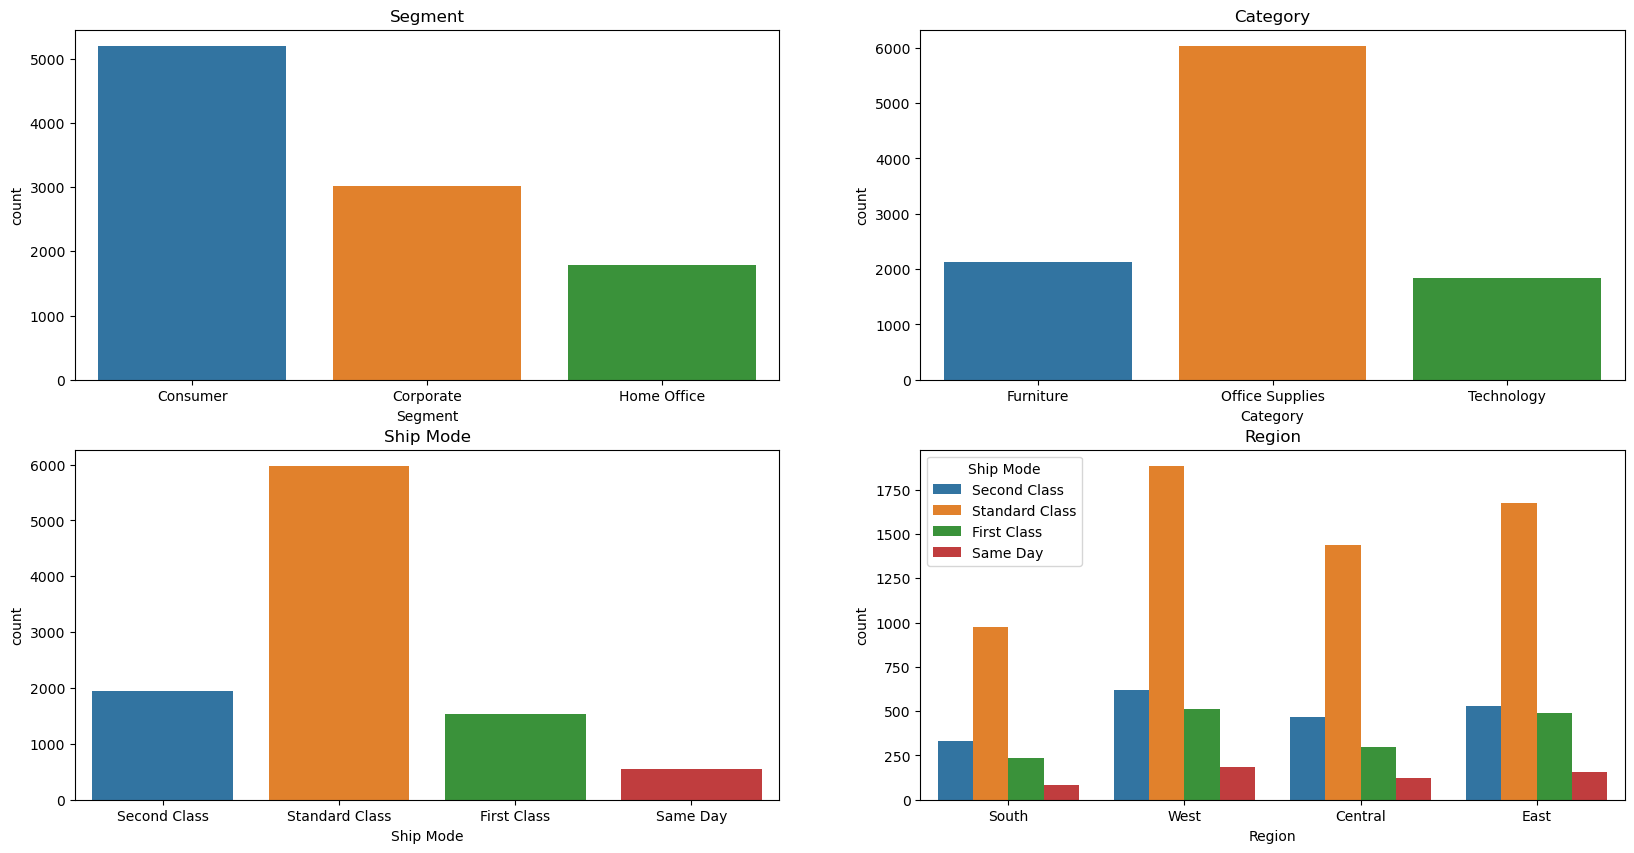

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(221)
# store['Segment'].value_counts().plot.bar(figsize=(20,10), title= 'Segment')
sns.countplot(x='Segment', data=store).set(title='Segment');

plt.subplot(222)
# store['Category'].value_counts().plot.bar(figsize=(20,10), title= 'Category')
sns.countplot(x='Category', data=store).set(title='Category');

plt.subplot(223)
sns.countplot(x='Ship Mode', data=store).set(title='Ship Mode');

plt.subplot(224)
sns.countplot(x='Region', data=store,  hue= store['Ship Mode']).set(title='Region');

### 2. Numerical

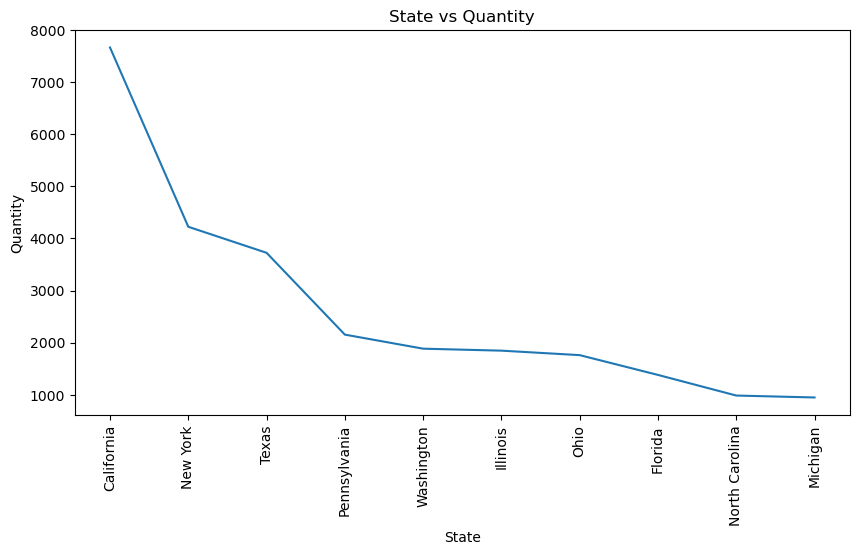

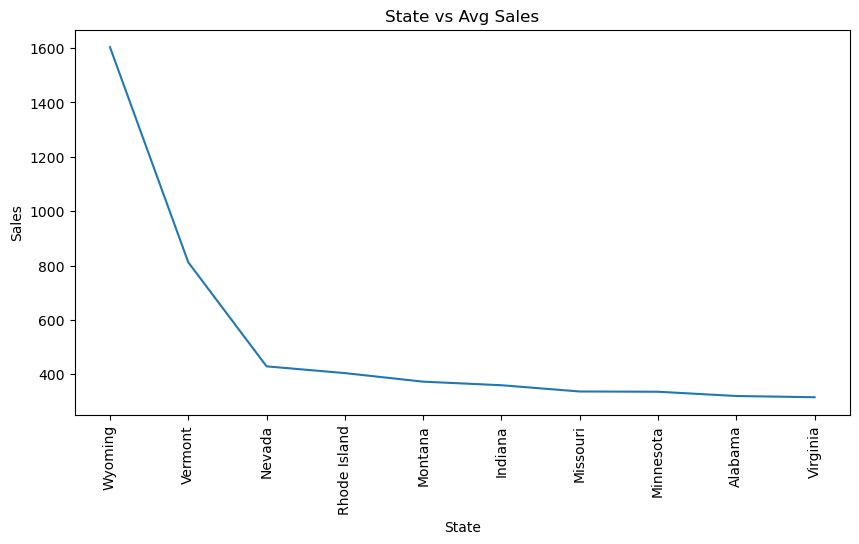

In [15]:
# grouping=store.groupby('State').agg({'Quantity':'mean'})
grouping=store.groupby('State').agg({'Quantity':'sum','Sales':'mean','Discount':'mean','Profit':'mean'})

top_Quantity = grouping.nlargest(10,'Quantity')
plt.figure(figsize=(10,5))
plt.title('State vs Quantity')
sns.lineplot(x='State', y='Quantity', data=top_Quantity.reset_index())
plt.xticks(rotation=90);

avg_sale = grouping.nlargest(10,'Sales')
plt.figure(figsize=(10,5))
plt.title('State vs Avg Sales')
sns.lineplot(x='State', y='Sales',markers='O',ms=5, data=avg_sale.reset_index())
plt.xticks(rotation=90);



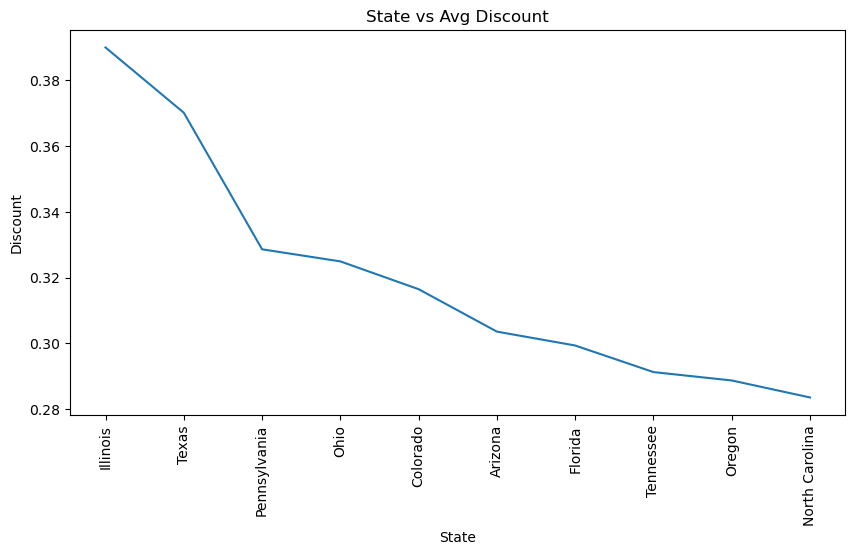

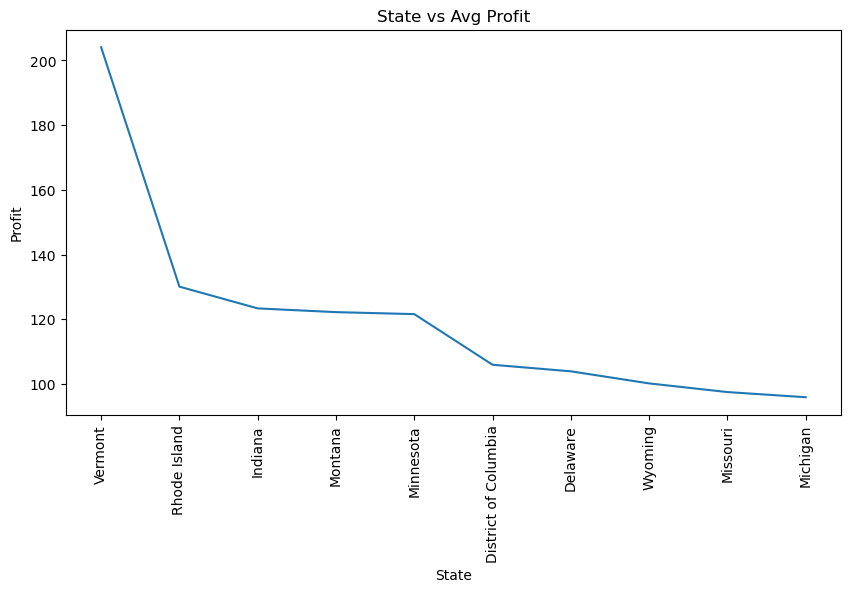

In [16]:
avg_discount = grouping.nlargest(10,'Discount') 
plt.figure(figsize=(10,5))
plt.title('State vs Avg Discount')
sns.lineplot(x='State',y='Discount', data=avg_discount.reset_index());
plt.xticks(rotation=90);

avg_profit = grouping.nlargest(10,'Profit') 
plt.figure(figsize=(10,5))
plt.title('State vs Avg Profit')
sns.lineplot(x='State',y='Profit', data=avg_profit.reset_index());
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Category'>

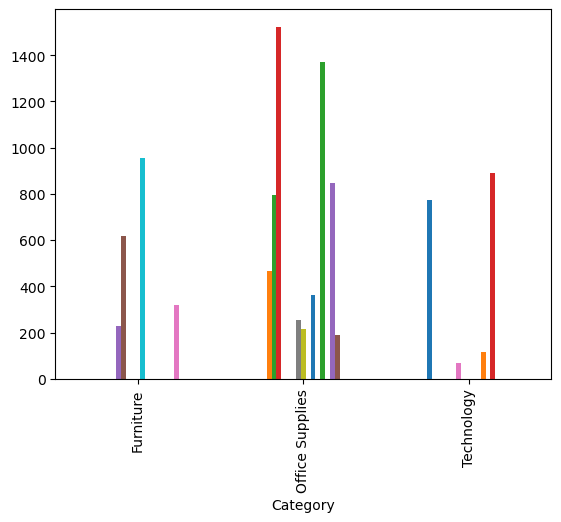

In [17]:
pd.crosstab(store['Category'],store['Sub-Category']).plot(kind = 'bar',legend = False)



In [18]:
df = pd.DataFrame(store.groupby(['Category','Sub-Category']).count().iloc[:,0]).reset_index()
pivot = pd.pivot_table(data=df, index=['Category'], columns=['Sub-Category'], values='Ship Mode')

# pivot = pd.pivot_table(data=df, index=['Category'], columns=['Sub-Category'], values='Ship Mode')
# pivot.plot()

<AxesSubplot:xlabel='Ship Mode'>

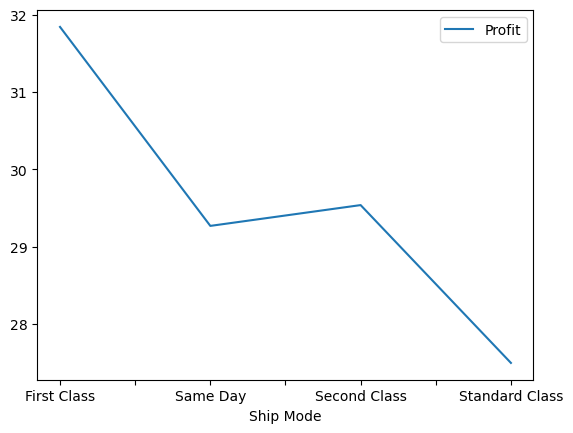

In [19]:
store.groupby('Ship Mode').agg({'Profit':'mean'}).plot(kind='line')

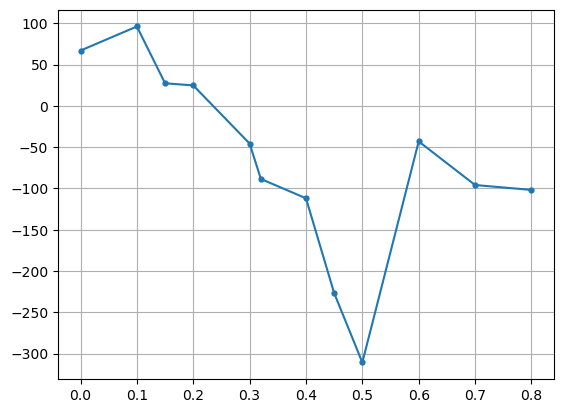

In [20]:
# store.groupby('Discount').agg({'Profit':'mean'}).plot(kind='line')
plt.plot(store.groupby('Discount').agg({'Profit':'mean'}),marker='o',ms=3.5)
plt.grid()



### Independent Variable (Numerical)

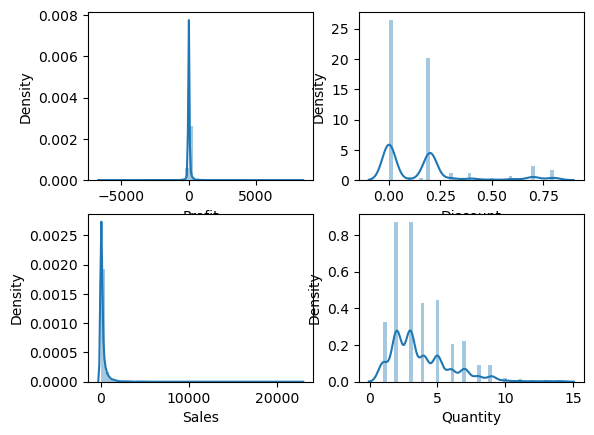

In [21]:
plt.subplot(221)
sns.distplot(store['Profit']);

plt.subplot(222)
sns.distplot(store['Discount']);

plt.subplot(223)
sns.distplot(store['Sales']);

plt.subplot(224)
sns.distplot(store['Quantity']);

In [22]:
store['Sales_log'] = np.log(store['Sales']) 


<AxesSubplot:xlabel='Sales_log', ylabel='Density'>

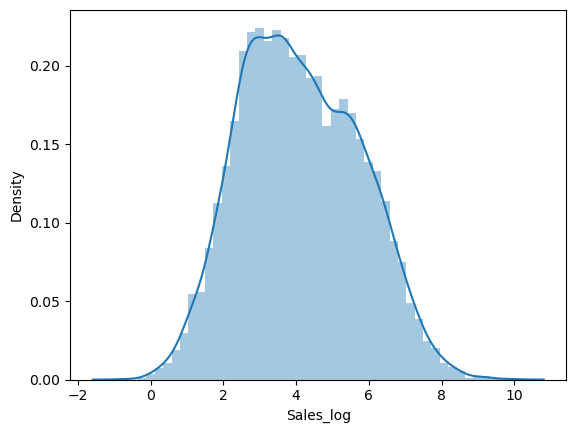

In [23]:
# store['Sales_log'].hist(bins=20) 
sns.distplot(store['Sales_log'])

## Categorical Independent Variable v/s Target Variable¶


In [24]:
state=pd.crosstab(store['State'],store['Profit_cat']) 
Ship_Mode = pd.crosstab(store['Ship Mode'],store['Profit_cat'])
Segment = pd.crosstab(store['Segment'],store['Profit_cat'])
Category = pd.crosstab(store['Category'],store['Profit_cat'])


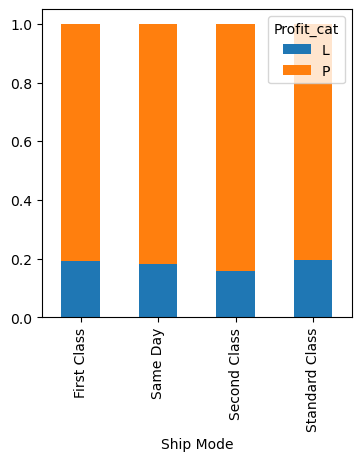

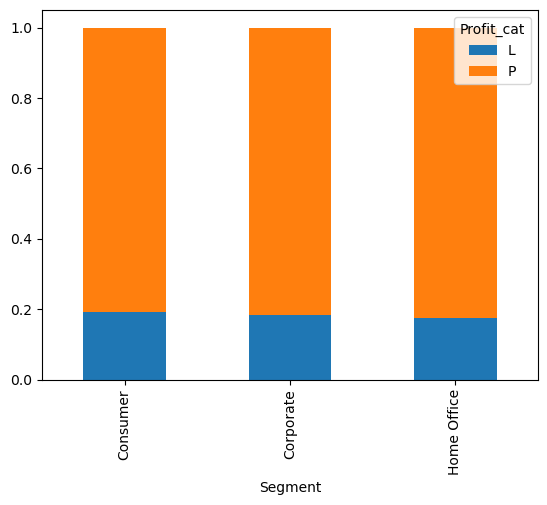

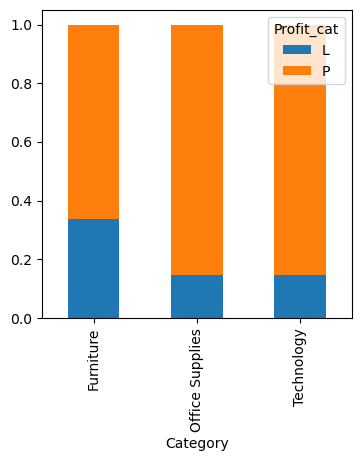

In [25]:
Ship_Mode.div(Ship_Mode.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Segment.div(Segment.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Category.div(Category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

In [26]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_cat,Sales_log
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,P,5.568192
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,P,6.595699
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,P,2.682390
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,L,6.864407
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,P,3.107631


In [27]:
store1 = store.drop(['Country','Postal Code','Sales','Profit_cat'],axis=1)
store1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales_log
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,41.9136,5.568192
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,219.5820,6.595699
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,6.8714,2.682390
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,-383.0310,6.864407
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,2.5164,3.107631


In [28]:
store = store.drop(['Country','Postal Code','Sales','Profit'],axis=1)
store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit_cat,Sales_log
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,P,5.568192
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,P,6.595699
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,P,2.682390
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,L,6.864407
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,P,3.107631


In [29]:
x = store.drop(['Profit_cat'],axis=1)
y = store['Profit_cat']

In [30]:
x=pd.get_dummies(x)


In [31]:
x.head()

,Quantity,Discount,Sales_log,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2,0.00,5.568192,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.00,6.595699,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.00,2.682390,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,5,0.45,6.864407,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0.20,3.107631,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [33]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
model.score(x_test,y_test)

0.9323729491796718

### Logistic regrssion

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [36]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    
    x_train1,x_test1 = x.loc[train_index],x.loc[test_index]     
    y_train1,y_test1 = y[train_index],y[test_index]         
    
    model = LogisticRegression(random_state=1)     
    model.fit(x_train1, y_train1)   
    
    pred_test = model.predict(x_test1)     
    score = accuracy_score(y_test1,pred_test)  
    
    score1 = model.score(x_test1,y_test1)
    
    print('accuracy_score',score)  
    print('score',score1)
    print(pred_test)
    
    i+=1


1 of kfold 5
accuracy_score 0.9429714857428715
score 0.9429714857428715
['P' 'P' 'P' ... 'P' 'P' 'P']

2 of kfold 5
accuracy_score 0.9384692346173087
score 0.9384692346173087
['P' 'P' 'P' ... 'P' 'P' 'P']

3 of kfold 5
accuracy_score 0.9414707353676839
score 0.9414707353676839
['P' 'P' 'P' ... 'P' 'P' 'P']

4 of kfold 5
accuracy_score 0.9529764882441221
score 0.9529764882441221
['L' 'P' 'P' ... 'P' 'P' 'P']

5 of kfold 5
accuracy_score 0.9354354354354354
score 0.9354354354354354
['P' 'P' 'L' ... 'P' 'P' 'P']


### 

In [37]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    
    x_train1,x_test1 = x.loc[train_index],x.loc[test_index]     
    y_train1,y_test1 = y[train_index],y[test_index]         
    
    model = LogisticRegression(random_state=1)     
    model.fit(x_train1, y_train1)   
    
    pred_test = model.predict(x_test1)     
    score = accuracy_score(y_test1,pred_test)  
    
    score1 = model.score(x_test1,y_test1)
    
    print('accuracy_score',score)  
    print('score',score1)
    
    i+=1


1 of kfold 5
accuracy_score 0.9429714857428715
score 0.9429714857428715

2 of kfold 5
accuracy_score 0.9384692346173087
score 0.9384692346173087

3 of kfold 5
accuracy_score 0.9414707353676839
score 0.9414707353676839

4 of kfold 5
accuracy_score 0.9529764882441221
score 0.9529764882441221

5 of kfold 5
accuracy_score 0.9354354354354354
score 0.9354354354354354


### Decision Tree

In [38]:
from sklearn import tree

In [39]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    
    x_train1,x_test1 = x.loc[train_index],x.loc[test_index]     
    y_train1,y_test1 = y[train_index],y[test_index]         
    
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(x_train1, y_train1)   
    
    pred_test = model.predict(x_test1)     
    score = accuracy_score(y_test1,pred_test)  
    
    score1 = model.score(x_test1,y_test1)
    
    print('accuracy_score',score)  
    print('score',score1)
    
    i+=1


1 of kfold 5
accuracy_score 0.9384692346173087
score 0.9384692346173087

2 of kfold 5
accuracy_score 0.9344672336168084
score 0.9344672336168084

3 of kfold 5
accuracy_score 0.9309654827413707
score 0.9309654827413707

4 of kfold 5
accuracy_score 0.9429714857428715
score 0.9429714857428715

5 of kfold 5
accuracy_score 0.938938938938939
score 0.938938938938939


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    
    x_train1,x_test1 = x.loc[train_index],x.loc[test_index]     
    y_train1,y_test1 = y[train_index],y[test_index]         
    
    model = RandomForestClassifier(random_state=1)     
    model.fit(x_train1, y_train1)   
    
    pred_test = model.predict(x_test1)     
    score = accuracy_score(y_test1,pred_test)  
    
    score1 = model.score(x_test1,y_test1)
    
    print('accuracy_score',score)  
    print('score',score1)
    
    i+=1


1 of kfold 5
accuracy_score 0.9424712356178089
score 0.9424712356178089

2 of kfold 5
accuracy_score 0.9409704852426213
score 0.9409704852426213

3 of kfold 5
accuracy_score 0.9419709854927464
score 0.9419709854927464

4 of kfold 5
accuracy_score 0.9494747373686844
score 0.9494747373686844

5 of kfold 5
accuracy_score 0.9414414414414415
score 0.9414414414414415


### GrandSearchCV on RF

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators


# paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [44]:
# grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [45]:
# from sklearn.model_selection import train_test_split 
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=1)

In [46]:
# Fit the grid search model 
# grid_search.fit(x_train,y_train)

In [47]:
# Estimating the optimized value 
# grid_search.best_estimator_

# Regression 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
store1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales_log
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,41.9136,5.568192
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,219.5820,6.595699
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,6.8714,2.682390
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,-383.0310,6.864407
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,2.5164,3.107631


In [53]:
X = store1.drop(['Profit'],axis = 1)
Y = store1['Profit']

In [54]:
# X = pd.get_dummies(X)

In [55]:
from sklearn.preprocessing import LabelEncoder

X_enc = X.copy()
for col in ['Ship Mode','Segment','City','State','Region','Category','Sub-Category']:
    le = LabelEncoder()
    X_enc[col] = le.fit_transform(X[col].values)
    
X_enc.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Sales_log
0,2,0,194,15,2,0,4,2,0.00,5.568192
1,2,0,194,15,2,0,5,3,0.00,6.595699
2,2,1,266,3,3,1,10,2,0.00,2.682390
3,3,0,153,8,2,0,16,5,0.45,6.864407
4,3,0,153,8,2,1,14,2,0.20,3.107631


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_enc,Y,test_size=0.3,random_state=1)

### 1. Linear Rgression

In [57]:
# lr = Pipeline([ # (Name, transformer)
#                ('imputer', SimpleImputer()), 
#                ('poly_feats', PolynomialFeatures()), 
#                ('std_scaler', StandardScaler()),
#                ('linear_regression', LinearRegression())])

In [58]:
lr = Pipeline([('scaler', StandardScaler()), 
               ('model', LinearRegression())])

In [59]:
# X_train

In [60]:
lr.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [61]:
lr.score(X_test,Y_test)

0.07048165158215192

In [62]:
lr.score(X_train,Y_train)

0.10008290315139434

In [63]:
Y_pred = lr.predict(X_test)

In [64]:
mse = mean_squared_error(Y_test,Y_pred)
mse**(1/2)

255.6596254323907

In [65]:
Y_test

1814     -8.5068
881       8.3268
1122      6.6584
6807     35.6613
2911     19.4580
          ...   
1287     11.1664
2762     36.9170
8820    311.9948
462       7.0680
2188     25.4730
Name: Profit, Length: 2999, dtype: float64

In [66]:
Y_pred

array([-18.1579598 ,  15.00196966,  52.94535679, ..., 123.04533489,
       -36.63623741,  56.89969477])

In [67]:
features =  store1.drop(['Profit'],axis=1).columns
features

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Quantity', 'Discount', 'Sales_log'],
      dtype='object')

In [68]:
lr1 = LinearRegression()

In [69]:
lr1.fit(X_train,Y_train)

LinearRegression()

In [70]:
lr1.coef_

array([ 3.65098811e-01,  6.76124773e+00,  1.28303112e-02, -1.31235656e-01,
       -8.31918516e+00,  2.85428961e+01, -3.63331563e+00, -4.83468594e-02,
       -2.18535111e+02,  2.64217271e+01])

In [71]:
df_coeff = pd.DataFrame(lr1.coef_,index=features,columns=['coefficients'])
df_coeff

,coefficients
Ship Mode,0.365099
Segment,6.761248
City,0.012830
State,-0.131236
Region,-8.319185
Category,28.542896
Sub-Category,-3.633316
Quantity,-0.048347
Discount,-218.535111
Sales_log,26.421727


In [76]:
X_enc1 = X_enc.drop(['Discount','Quantity','Region','State','Sub-Category'],axis=1)
X_enc1.head()

,Ship Mode,Segment,City,Category,Sales_log
0,2,0,194,0,5.568192
1,2,0,194,0,6.595699
2,2,1,266,1,2.682390
3,3,0,153,0,6.864407
4,3,0,153,1,3.107631


In [77]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_enc1,Y,test_size=0.3,random_state=1)

In [82]:
lr2 = LinearRegression()

In [83]:
lr2.fit(X_train1,Y_train1)

LinearRegression()

In [84]:
lr2.score(X_test1,Y_test1)

0.03007917279087069

In [113]:
Y_pred1 = lr2.predict(X_test1)
Y_pred1

array([ 26.78003123,  14.78472018,  -3.93265466, ..., 145.21084288,
       -18.24773707,   2.54018148])

In [89]:
Y_test1

1814     -8.5068
881       8.3268
1122      6.6584
6807     35.6613
2911     19.4580
          ...   
1287     11.1664
2762     36.9170
8820    311.9948
462       7.0680
2188     25.4730
Name: Profit, Length: 2999, dtype: float64

In [114]:
mse = mean_squared_error(Y_test1,Y_pred1)
mse**(1/2)

261.1567812634159

### 2.Lasso

In [90]:
ls = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])

In [91]:
ls.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])

In [92]:
ls.score(X_test,Y_test)

0.07131566619832763

In [116]:
Y_pred1_ls = ls.predict(X_test)

In [118]:
mse = mean_squared_error(Y_test,Y_pred1_ls)
mse

65303.19786080857

In [95]:
Y_test

1814     -8.5068
881       8.3268
1122      6.6584
6807     35.6613
2911     19.4580
          ...   
1287     11.1664
2762     36.9170
8820    311.9948
462       7.0680
2188     25.4730
Name: Profit, Length: 2999, dtype: float64

In [117]:
Y_pred1_ls

array([-15.369329  ,  18.41000843,  51.14959573, ..., 118.52996997,
       -36.82427318,  54.95921695])

In [97]:
ls1 = Lasso()

In [98]:
ls1.fit(X_train1,Y_train1)

Lasso()

In [100]:
ls1.score(X_test1,Y_test1)

0.03085508647441404

In [120]:
Y_pred1_ls_2 = ls1.predict(X_test1)
Y_pred1_ls_2

In [121]:
mse = mean_squared_error(Y_test,Y_pred1_ls_2)
mse

68148.30372412984

### 3.Ridge

In [101]:
rg = Pipeline([('scaler', StandardScaler()), ('model', Ridge())])

In [102]:
rg.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())])

In [103]:
rg.score(X_test,Y_test)

0.07048185141121832

In [104]:
Y_pred2 = rg.predict(X_test)

In [105]:
mse = mean_squared_error(Y_test,Y_pred2)
mse

65361.83002465586

In [106]:
Y_test

1814     -8.5068
881       8.3268
1122      6.6584
6807     35.6613
2911     19.4580
          ...   
1287     11.1664
2762     36.9170
8820    311.9948
462       7.0680
2188     25.4730
Name: Profit, Length: 2999, dtype: float64

In [107]:
Y_pred2

array([-18.14864903,  15.00620926,  52.94359685, ..., 123.03094694,
       -36.62398007,  56.88962342])

In [108]:
rg1 = Ridge()

In [109]:
rg1.fit(X_train1,Y_train1)

Ridge()

In [111]:
rg1.score(X_test1,Y_test1)

0.03008118244966318

### KNeighborsRegressor

In [123]:
knn = KNeighborsRegressor()

In [124]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [126]:
knn.score(X_test,Y_test)

0.067122163473043

In [129]:
Y_pred_knn = knn.predict(X_test)
Y_pred_knn

array([   7.75978,   47.17216,   37.83036, ..., -103.38794,    3.21256,
         59.33604])

In [130]:
Y_test

1814     -8.5068
881       8.3268
1122      6.6584
6807     35.6613
2911     19.4580
          ...   
1287     11.1664
2762     36.9170
8820    311.9948
462       7.0680
2188     25.4730
Name: Profit, Length: 2999, dtype: float64

In [131]:
knn1 = KNeighborsRegressor()

In [133]:
knn1.fit(X_train1,Y_train1)

KNeighborsRegressor()

In [134]:
knn1.score(X_test1,Y_test1)

0.13074236102233117

In [135]:
Y_pred_knn1 = knn.predict(X_test1)
Y_pred_knn1

array([ 27.19392,   5.1479 ,   7.5932 , ..., -83.90178, -10.96628,
         6.87808])

In [139]:
Y_test1

1814     -8.5068
881       8.3268
1122      6.6584
6807     35.6613
2911     19.4580
          ...   
1287     11.1664
2762     36.9170
8820    311.9948
462       7.0680
2188     25.4730
Name: Profit, Length: 2999, dtype: float64

### SVM regressor

In [140]:
svr = SVR()

In [141]:
svr.fit(X_train,Y_train)

SVR()

In [143]:
svr.score(X_test,Y_test)

-0.003711891228253217